# Exploration des bases de données et premières statistiques descriptives

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Données France

## 1.1. Données trafic aérien

In [2]:
# On commence par visualiser la table
df_air_traffic_france = pd.read_csv('france_air_traffic_210712.csv')
df_air_traffic_france.head(5)

,country_origin,citydest,sheduled_time_start,seats,number_planes
0,Albania,Nantes,2021-10-12,189.0,1
1,Albania,Paris,2017-08-17,189.0,1
2,Albania,Paris,2017-08-19,189.0,1
3,Albania,Paris,2017-08-22,189.0,1
4,Albania,Paris,2020-08-12,148.0,1


On cherche à déterminer le nombre de vols et le nombre de sièges vers les différentes destinations françaises.

In [3]:
# On fait la somme du nombre de sièges et de vols par destination 
df_air_traffic_france2=df_air_traffic_france.groupby('citydest').sum()
df_air_traffic_france2=df_air_traffic_france2.reset_index()

In [4]:
# Total de sièges et de vols vers la France
df_air_traffic_france3=df_air_traffic_france2.sum()
df_air_traffic_france3

citydest         AgenAjaccioAngersAurillacAuxerreBaselBastiaBer...
seats                                                  1.53327e+08
number_planes                                               882879
dtype: object

Au total, il y a 882 879 vols qui arrivent sur le sol français.

Text(0, 0.5, 'Destination')

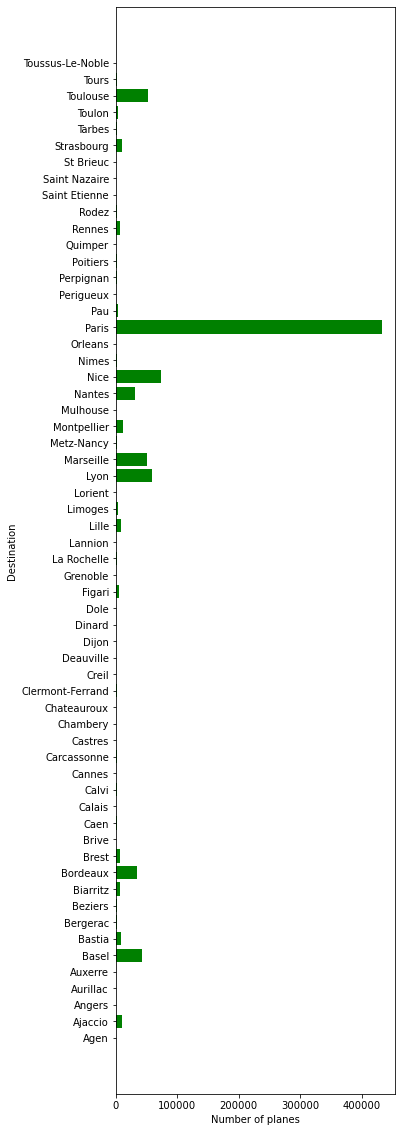

In [5]:
# On visualise le nombre de vols qui arrivent dans les différents aéroports français.
fig = plt.figure(1, figsize=(5, 20))
plt.barh( df_air_traffic_france2["citydest"], df_air_traffic_france2['number_planes'], color="green")
plt.xlabel('Number of planes')
plt.ylabel('Destination')

([<matplotlib.patches.Wedge at 0x19d52e9e8b0>,
 [Text(1.0999994461932736, 0.0011038000233263795, 'Agen'),
  Text(1.0992337673826615, 0.04105026973992905, 'Ajaccio'),
  Text(1.0970977290406387, 0.07985344659984135, 'Angers'),
  Text(1.0970963081343514, 0.07987296587692676, 'Aurillac'),
  Text(1.0970954554238495, 0.07988467743151254, 'Auxerre'),
  Text(1.0720315794874566, 0.2464716871805543, 'Basel'),
  Text(1.0103077054831477, 0.4350613063022011, 'Bastia'),
  Text(0.9943745922247869, 0.47033942035278004, 'Bergerac'),
  Text(0.9876760800594864, 0.4842478300192239, 'Beziers'),
  Text(0.9724336980428621, 0.5141718612591356, 'Biarritz'),
  Text(0.8864661028152749, 0.6512893739034122, 'Bordeaux'),
  Text(0.7816323744843091, 0.7739837408873786, 'Brest'),
  Text(0.7610370884899047, 0.7942433820579238, 'Brive'),
  Text(0.7565824250335796, 0.7984879674298843, 'Caen'),
  Text(0.7539729298510308, 0.8009524461863217, 'Calais'),
  Text(0.7485406078090335, 0.8060316113285402, 'Calvi'),
  Text(0.74304

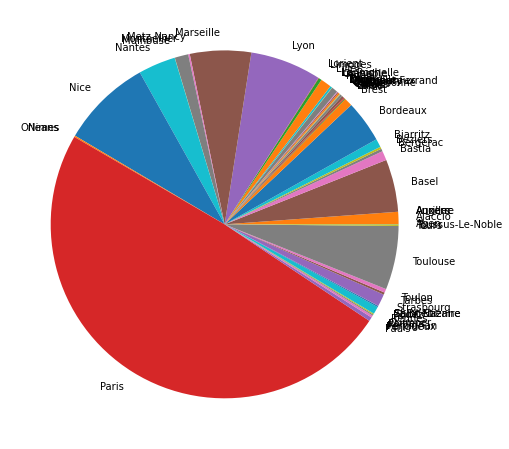

In [6]:
# Pie pour que le résultat soit plus visuel 
# pas très beau, à rendre plus joli
df_air_traffic_france2
fig = plt.figure(1, figsize=(8, 8))
plt.pie(df_air_traffic_france2['number_planes'], labels=df_air_traffic_france2["citydest"])


La très grande majorité des vols arrive sur le sol français à Paris (49% des vols). Viennent ensuite d'autres métropoles comme Nice (8,4%) Lyon (6,6%), Toulouse (5,9%), Marseille (5,7%), Basel (4,9%) ou Bordeaux (3,9%).

In [7]:
# A peu près pareil pour le nombre de sièges 
# fig = plt.figure(1, figsize=(3, 20))
# plt.barh( df_air_traffic_france2["citydest"], df_air_traffic_france2['seats'], color="green")
# plt.xlabel('Number of seats')
# plt.ylabel('Destination')

On cherche à étudier le trafic aérien.

Text(0, 0.5, 'Number of planes')

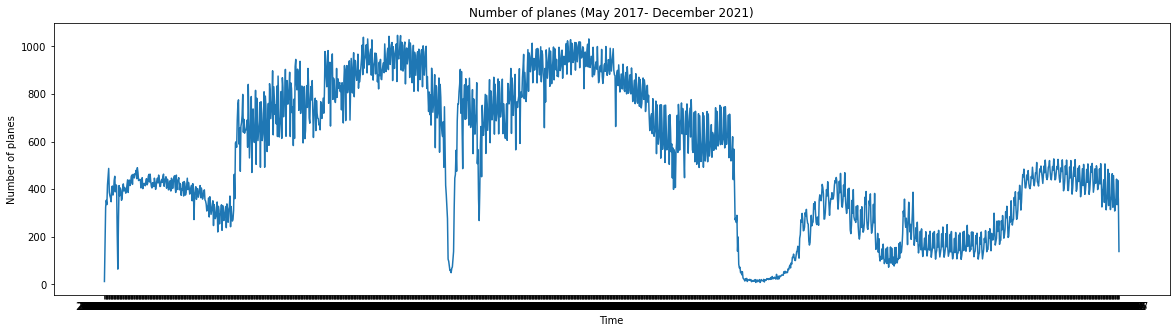

In [8]:
df_air_traffic_france4=df_air_traffic_france.groupby('sheduled_time_start').sum()
df_air_traffic_france4=df_air_traffic_france4.reset_index()
x=df_air_traffic_france4["sheduled_time_start"]
y=df_air_traffic_france4["number_planes"]
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, y)
plt.title('Number of planes (May 2017- December 2021)')
plt.xlabel('Time')
plt.ylabel('Number of planes')

Text(0, 0.5, 'Number of seats')

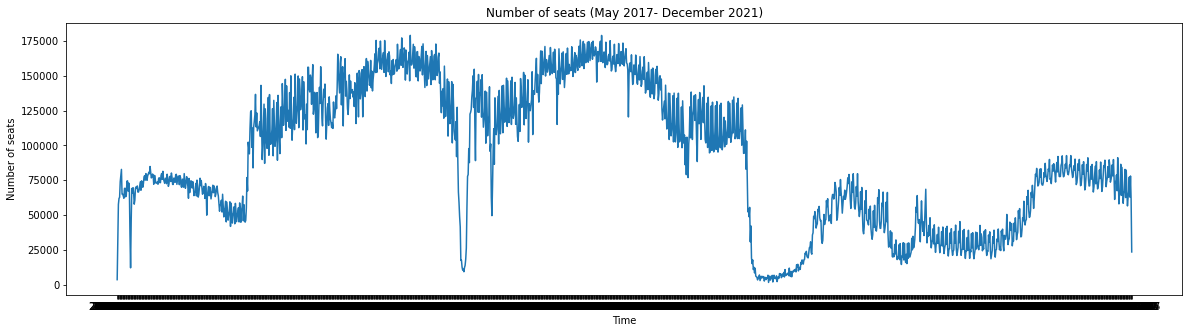

In [9]:
df_air_traffic_france4=df_air_traffic_france.groupby('sheduled_time_start').sum()
df_air_traffic_france4=df_air_traffic_france4.reset_index()
x=df_air_traffic_france4["sheduled_time_start"]
y=df_air_traffic_france4["seats"]
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, y)
plt.title('Number of seats (May 2017- December 2021)')
plt.xlabel('Time')
plt.ylabel('Number of seats')

On observe une très forte diminution des vols et du nombre de sièges avec l'arrivée de la crise sanitaire, début 2020. Le niveau d'avant covid n'a jamais été rattrapé.

On cherche à étudier la provenance des touristes qui arrivent en France.

In [10]:
df_air_traffic_france5=df_air_traffic_france.groupby('country_origin').sum()
df_air_traffic_france5=df_air_traffic_france5.reset_index()

Text(0, 0.5, 'Provenance')

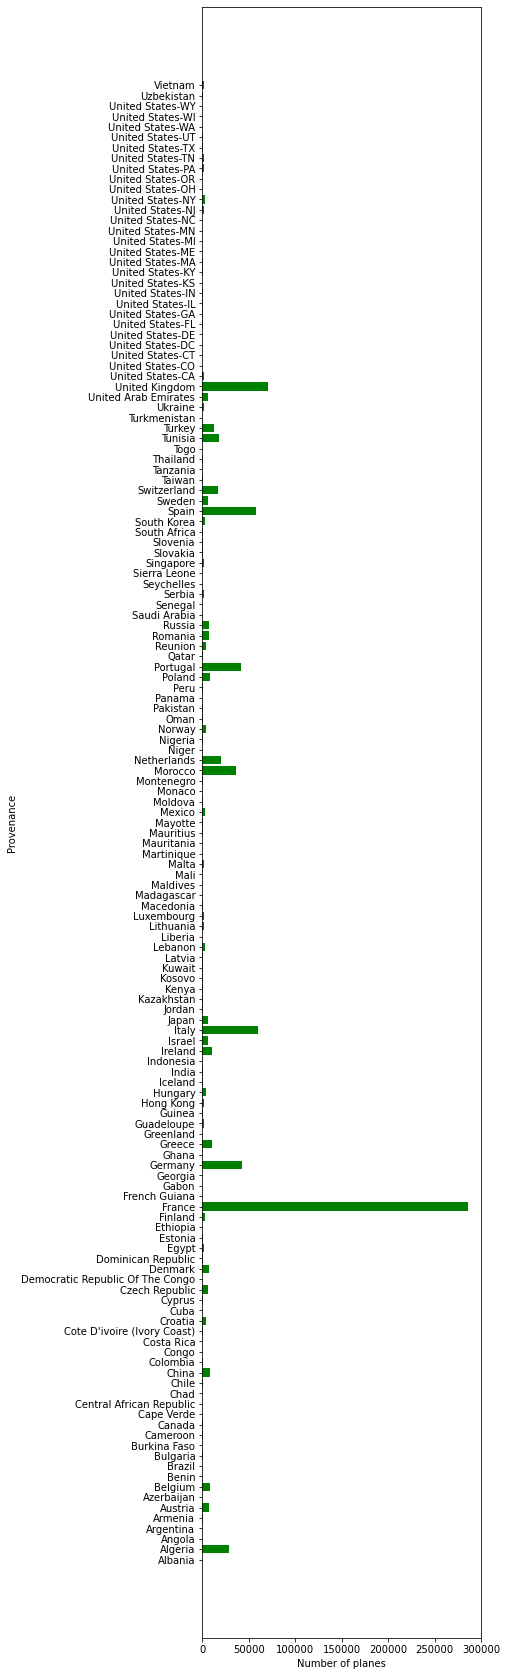

In [11]:
fig = plt.figure(1, figsize=(5, 30))
plt.barh( df_air_traffic_france5["country_origin"], df_air_traffic_france5['number_planes'], color="green")
plt.xlabel('Number of planes')
plt.ylabel('Provenance')

In [12]:
# importation de la table "world" de geopandas pour classer les pays par continent 
# df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world=pd.read_csv("world.csv")
world.rename(columns={'name': 'country_origin'}, inplace=True)
df_air_traffic_france5=df_air_traffic_france5.merge(world, on='country_origin', how='left')
df_air_traffic_france5
df_air_traffic_france5=df_air_traffic_france5.groupby('continent').sum()
df_air_traffic_france5=df_air_traffic_france5.reset_index()

Text(0.5, 1.0, 'Provenance des voyageurs')

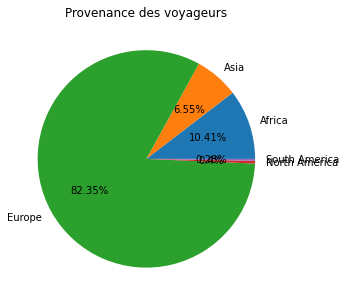

In [13]:
fig = plt.figure(1, figsize=(5, 5))
plt.pie(df_air_traffic_france5['number_planes'], labels=df_air_traffic_france5["continent"], autopct = lambda x: str(round(x, 2)) + '%')
plt.title("Provenance des voyageurs")

## 1.2. Données sur l'occupation des hôtels

In [14]:
df_France_Official_Data = pd.read_csv('France_Official_Data.csv')
df_France_Official_Data

,date,variable,department,individus,value_in_thousands
0,2011-01,Arrivées dans l'hôtellerie,Ain,Non-résidents,7.41
1,2011-02,Arrivées dans l'hôtellerie,Ain,Non-résidents,9.54
2,2011-03,Arrivées dans l'hôtellerie,Ain,Non-résidents,12.55
3,2011-04,Arrivées dans l'hôtellerie,Ain,Non-résidents,13.03
4,2011-05,Arrivées dans l'hôtellerie,Ain,Non-résidents,12.97
...,...,...,...,...,...
24955,2021-06,Arrivées dans l'hôtellerie,Yvelines,Résidents,65.91
24956,2021-07,Arrivées dans l'hôtellerie,Yvelines,Résidents,71.18
24957,2021-08,Arrivées dans l'hôtellerie,Yvelines,Résidents,56.66
24958,2021-09,Arrivées dans l'hôtellerie,Yvelines,Résidents,73.9


In [15]:
df_reviews_us_france_210712 = pd.read_csv('reviews_us_france_210712.csv')
df_reviews_france=df_reviews_us_france_210712[df_reviews_us_france_210712['country']=="France"]
df_reviews_france

,country,city,reviewerLocation,publication_date,stay_date,number_of_reviewers
77,France,Paris,France,2021-11-14,2021-11,87
163,France,Paris,France,2021-11-22,2021-11,69
179,France,Paris,France,2021-11-29,2021-11,67
189,France,Paris,France,2021-11-28,2021-11,65
232,France,Paris,France,2021-11-15,2021-11,59
...,...,...,...,...,...,...
119223,France,Paris,Turkey,2018-08-07,2018-07,1
119224,France,Nice,Poland,2021-07-19,2021-06,1
119225,France,Paris,Turkey,2018-08-05,2018-08,1
119226,France,Strasbourg,Botswana,2021-07-14,2021-07,1


# 2. Données USA

In [16]:
df_US_Official_Data_International = pd.read_csv('United_States_Official_Data_International.csv')
df_US_Official_Data_International

,date,individus,value,variable,department
0,2020-01,Total International,5795646,arrivals,United States
1,2020-02,Total International,4991503,arrivals,United States
2,2020-03,Total International,3137009,arrivals,United States
3,2020-04,Total International,248952,arrivals,United States
4,2020-05,Total International,272296,arrivals,United States
...,...,...,...,...,...
8065,2021-06,Thailand,2032,arrivals,United States
8066,2021-07,Thailand,2834,arrivals,United States
8067,2021-08,Thailand,4273,arrivals,United States
8068,2021-09,Thailand,2210,arrivals,United States


In [17]:
df_us_air_traffic = pd.read_csv('us_air_traffic_210712.csv')
df_us_air_traffic

,sheduled_time_start,country_origin,city_dest_,seats,number_planes
0,2017-05-15,United States-HI,Phoenix-AZ,234.0,1
1,2017-05-15,United States-HI,Seattle-WA,215.0,1
2,2017-05-16,Argentina,Atlanta-GA,375.0,1
3,2017-05-16,Argentina,Miami-FL,643.0,2
4,2017-05-16,Argentina,New York-NY,293.0,1
...,...,...,...,...,...
4033878,2021-12-07,United States-WY,United States-MT,234.0,1
4033879,2021-12-07,United States-WY,United States-WY,21.0,1
4033880,2021-12-07,"Virgin Islands, Us",Atlanta-GA,234.0,1
4033881,2021-12-07,"Virgin Islands, Us",Miami-FL,323.0,2


In [18]:
df_reviews_usa=df_reviews_us_france_210712[df_reviews_us_france_210712['country']=="United States"]
df_reviews_usa

,country,city,reviewerLocation,publication_date,stay_date,number_of_reviewers
0,United States,Las Vegas,United States of America,2021-11-29,2021-11,164
1,United States,Las Vegas,United States of America,2021-04-12,2021-04,140
2,United States,Las Vegas,United States of America,2021-06-28,2021-06,136
3,United States,Las Vegas,United States of America,2021-04-26,2021-04,134
4,United States,Las Vegas,United States of America,2021-07-06,2021-07,130
...,...,...,...,...,...,...
221188,United States,Chicago,Croatia,2018-09-13,2018-09,1
221189,United States,Chicago,Croatia,2018-09-18,2018-08,1
221190,United States,Chicago,Croatia,2018-09-23,2018-09,1
221191,United States,Chicago,Croatia,2018-09-30,2018-09,1
